In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import numpy as np

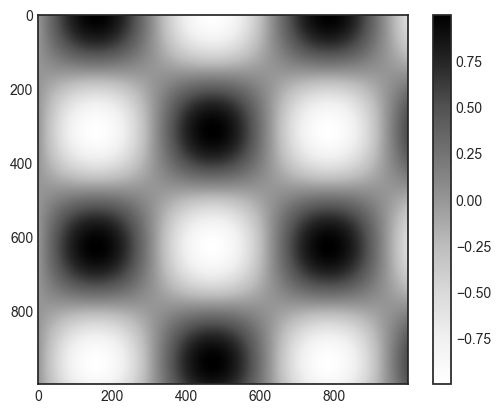

In [7]:
# 最簡單的色彩條
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

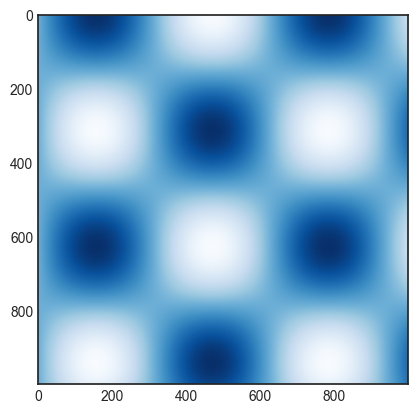

In [8]:
# 使用cmap 參數指定色彩定義表
plt.imshow(I, cmap='Blues');

In [9]:
# 把jet 色彩轉為黑白
from matplotlib.colors import LinearSegmentedColormap
def grayscale_cmap(cmap):
    # 給一個色彩對應表 然後回傳一個灰階版本
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # 轉換RGBA 成為感知的灰階亮度
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3]**2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N
    )

def view_colormap(cmap):
    # 並列顯示一個色彩對應表 與其之灰階版本
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

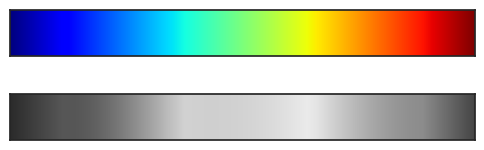

In [10]:
# jet 色彩太不均勻 目光會被較不重要的部分所吸引
view_colormap('jet')

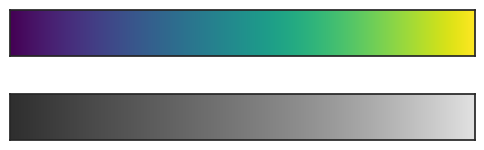

In [11]:
# viridis 表現較好
view_colormap('viridis')

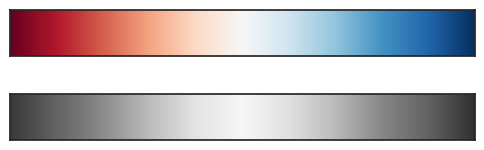

In [12]:
# 正負偏差值 會消失
view_colormap('RdBu')

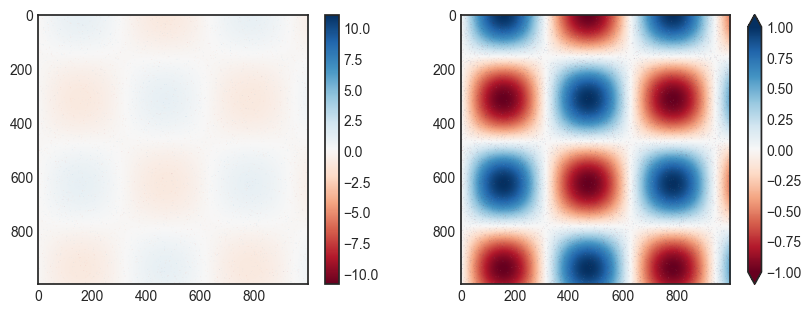

In [13]:
# 製造 1% 的雜訊
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

# 預設的範圍
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

# 使用extend 突破限制的範圍
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

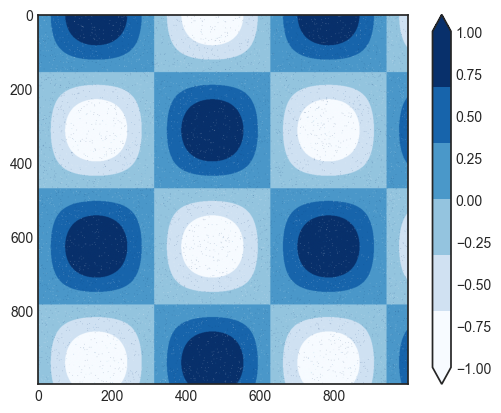

In [14]:
# plt.get_cmap() 中指定要呈現的離散值個數
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1);

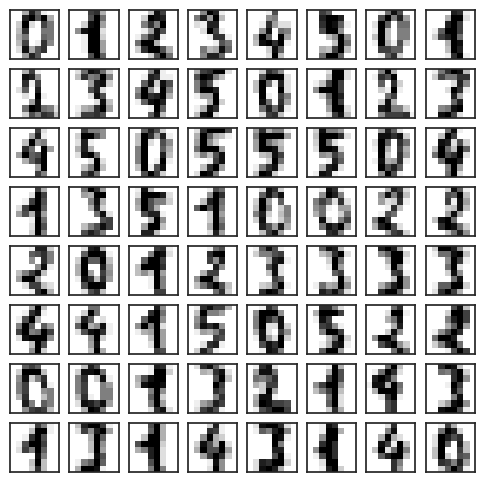

In [16]:
# 從scikit learn 下載資料集
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

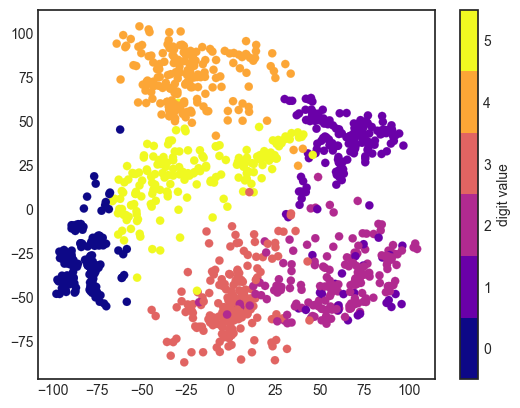

In [ ]:
# 使用 IsoMap 把數字元投影到二維空間
from sklearn.manifold import Isomap
iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

# 可以看出每個數字的重疊性
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap('plasma', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)